# INFO 2950 Final Project
### Arno Motulsky (atm76) and Tomer Poole-Dayan (tdp42)

In [442]:
import pandas as pd
import numpy as np
import duckdb, sqlalchemy
import seaborn as sns
from matplotlib import pyplot
import requests
from bs4 import BeautifulSoup
import time
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.formula.api import ols,wls
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant as ac

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from kmodes.kprototypes import KPrototypes

In [443]:
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [444]:
pd.set_option('display.max_columns',None)
big_trees = pd.read_csv('2015StreetTreesCensus.csv')
trees_by_zip = pd.read_csv('trees_by_zip.csv')

# Introduction:

New York City, full of tall buildings and busy streets, isn't typically thought of for its trees. Still, there are a vast number of trees that can be found in parks, in backyards, and on the streets of America's largest city. Perhaps somewhat surprisingly, New York City has nearly 700,000 trees planted into dirt planters in its sidewalks. This doesn't include any privately owned trees or park trees, such as those in the famous and expansive Central Park -- just the ones on the sidewalks.\
\
Having both grown up in New York City in very different neighborhoods, we were interested in what factors determine whether a certain neighborhood or street has more trees than others. This difference is especially interesting because the sidewalk trees are publicly funded and thus influenced by city policy. The NYC Parks department chooses where to plant these trees and how well to maintain them, although of course some trees do benefit from kind acts of watering, mulch, and sometimes dogs.\
\
The differences in street trees between neighborhoods is especially important because street trees provide enormous benefits to the communities that live around them: improving air quality, reducing energy use, reducing stormwater runoff, and increasing property values, among others. Street trees help improve air quality by filtering pollutants from the air, helping reduce the incidence of respiratory problems and producting cost savings for individuals and the healthcare system. Street trees also provide shade in the summer, reducing energy usage for air conditioning and providing shade for people walking on the sidewalks. And lastly, street trees increase property values by improving neighborhood aesthetics.\
\
We wanted to investigate whether certain neighborhoods received preferrential treatment in the city's allocation and maintenence of street trees and thus benefitted unfairly from the numerous downstream benefits that street trees provide for an area -- providing insight into an overlooked potential disparity between neighborhoods within NYC. This led us to our research questions:
### *Which socioeconomic factors are the strongest predictors for the number of public curbside trees in a NYC neighborhood?* Are there significant differences in the types of trees planted in different NYC neighborhoods?
In order to investigate this question, we began with data from the city's 2015 tree census in which all curbside trees were documented along with their location, species, size, and more. We used the location data to find the total number of street trees in each zipcode. We then combined this dataframe with demographic and socioeconomic data for each zipcode from SimplyAnalytics to form our primary dataset. This demographic and socioeconomic data from SimplyAnalytics included Median Household Income, Racial Percentages, Walk to Work Percentage, Average Household Medical Expenditures, the Number of Computers per Household, Population and School Tuition Average, among others.


### Results Overview
After running various regressions and hypothesis tests, we find that Median Household Income is a statistically significant predictor of the number of public street trees per 100k residents per square mile in a zip code. Specifically, the number of trees increased by **0.1053** for every dollar increase in median household income. With a **t-value of 8.055**, we have a **confidence level of .999** that this result is statistically significant.

Additionally, when we expand our model to include input variables including income, racial makeup, and borough, the fit improves over a single variable regression.

# Data Description:
Data Description Draft
Original datasets can be found at the following link: https://cornell.box.com/s/2xiepfs6he94ijg66508tpsd9m2d4nyj 

### Motivation:
The original dataset of trees in New York City was created by the NYC Parks department through its “TreeCount! 2015” initiative. It was funded by the department of parks and recreation, although it was created almost entirely through volunteer work. The dataset was created to track the location, size, species, and condition of all public curbside trees in the city. The first inventory was taken in 1995, and it has been updated each decade since. Having an accurate inventory of trees leads to many benefits for the parks department, including getting funding for street tree pruning and quantifying the ecological and economic benefits of trees. 

A dataset containing demographic information for each zip code was much harder to attain. We ended up using SimplyAnalytics, a  provider of geographic analytics to educational institutions, non-profit organizations, businesses and government agencies. The source of most of SimplyAnalytics' data is the US Census and the American Community Survey which are funded by the government. SimplyAnalytics is a reputable source that is used by many credible universities. 

Our motivation for this project stems from our backgrounds as New York City residents interested in sustainability. We realized that growing up, the presence of nature (specifically trees) was pretty hard to come by in the city, but it was certainly appreciated wherever we could find it. This made us wonder about which neighborhoods had more trees and whether there were common characteristics between those neighborhoods. The benefits of street trees are numerous: they intercept stormwater, remove air pollutants, intake carbon dioxide, improve natural beauty, provide shade, and more. If more trees were planted by the city in a specific neighborhood, the residents of that neighborhood would reap most of the benefits. We suspected that wealthier neighborhoods would have more street trees while poorer neighborhoods would have fewer. This project aims to investigate that claim, as well as other socioeconomic factors that may impact the quantity of street trees such as race.

### Composition: 
Each row in the original dataset represents a single observation of a public curbside tree in New York City. There are 683,788 rows in total which represent all possible instances as every block was covered by the survey. Each row is associated with an identification number which is unique for every tree. The columns in the dataset correspond to various attributes of each tree, either recorded manually or automatically. They include date observed, species, location, diameter, condition, nativity status, and more. 

After cleaning, each row in the zip code dataset represents a single zip code. The columns correspond to different demographic and socioeconomic data categories. There are 180 rows in the dataframe, which are all of the relevant zip codes in New York City. Both datasets are self contained and do not contain any data that may be considered offensive or confidential.
	

### Collection Process:

The data associated with each instance was recorded by one of over 2,200 volunteer citizen mappers as part of the TreeCount! 2015 project. Each volunteer used mapping tools including tape measures, survey wheels, tree identification keys and a web app specifically designed to be used by non-technical users to collect standardized, consistent data. The volunteers came from a variety of backgrounds and neighborhoods across the city, and many of them were part of an existing community group that partnered with the NYC Parks department for this project. They were not paid for their participation. The data was collected between May 2015 and October 2016, and while some years have passed since then, we still believe it to be a representative and relevant indicator of the trees in New York City today.

The zip code data was mainly acquired through the United States Census and American Community Survey. This is mostly self-reported data collected through the surveys. The Census does employ paid workers to help collect responses from households that have not responded to the survey. Individuals that respond consent to the use of the data and understand that their personal data is not used, rather an aggregation of data in their census tract. 

### Preprocessing/Cleaning/Labeling:
The link to the source of the original tree dataset is as follows: https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/pi5s-9p35 

There was only one modification made directly to the csv file itself. It was found that there were 935 cases of a zipcode of “83” being listed. By looking manually at the addresses for a couple dozen of these cases, it was found that the actual zipcode was always 10029. Therefore all of the 83 values were replaced with 10029 in the csv file before conducting other data cleaning procedures in Jupyter Notebook. 

The zip code data was downloaded from SimplyAnalytics. The site offers a wide variety of demographic and socioeconomic data, and we selected the ones we thought could potentially be relevant. Once the data was exported from the website, it became clear that certain zip codes were not relevant to the study as their population was zero. One example of this is the zip code 11371, which is just the LaGuardia airport. In total, 13 zip codes of this type were manually removed from the dataset as this study concerns the demographic statistics of the people living in a zip code, and zip codes with no residents have no demographic data. 

### Uses:
The New York City tree census data is used by the parks department in order to secure funding and conduct research about the ecological and economic benefits of public curbside trees. Zip code data is broadly used to determine socioeconomic characteristics of a particular neighborhood. In this project, we intend to use the underlying data to investigate our research question for educational purposes. 
 


In [445]:
big_trees.head()

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp
0,8/27/15,"180,683","348,711",POINT (-73.84421521958048 40.723091773924274),3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,"1,027,431.15","202,756.77"
1,9/3/15,"200,540","315,986",POINT (-73.81867945834878 40.79411066708779),21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,"1,034,455.70","228,644.84"
2,9/5/15,"204,026","218,365",POINT (-73.93660770459083 40.717580740099116),3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,"1,001,822.83","200,716.89"
3,9/5/15,"204,337","217,969",POINT (-73.93445615919741 40.713537494833226),10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,"1,002,420.36","199,244.25"
4,8/30/15,"189,565","223,043",POINT (-73.97597938483258 40.66677775537875),21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,"990,913.78","182,202.43"


Tree Census dataset from the NYC parks department with data for every street tree in the city.

In [446]:
trees_by_zip.head()

,zip,borough,household_income,white_pct,black_pct,asian_pct,population,SchoolTuitionAvg,male_pct,hispanic_pct,employment_pct,walk_to_work_pct,healthcare_avg,Computers_per_house,land_area,TreeCount,AverageDiameter,trees_per_capita,trees_per_sq_mile,trees_per_capita_sq_mile,Pct_Good,Pct_Fair,Pct_Poor,Pct_Dead,Pct_London_Planetree,Pct_Honeylocust,Pct_Callery_Pear,Pct_Pin_Oak,Pct_Norway_Maple,Pct_Littleleaf_Linden,Pct_Cherry,Pct_Japanese_Zelkova,Pct_Ginkgo,Pct_1or2_stewardship,Pct_3or4_stewardship,Pct_4orMore_stewardship,Pct_No_stewardship,Pct_Helpful_guards,Pct_Harmful_guards,Pct_Unsure_guards,Pct_no_guards,Brooklyn,Manhattan,Queens,Staten Island
0,10001,Manhattan,91733.852137,66.3706,2.9910,25.8797,23872.0,440.8418,50.6325,14.3976,72.0773,27.9151,8224.7656,0.567527,0.62,911.0,7.082327,0.038162,1469.354839,6155.139237,84.588235,11.764706,3.647059,6.695939,2.305159,28.210757,14.928650,7.025247,0.000000,0.0,0.109769,8.232711,4.390779,25.356751,8.671789,0.878156,58.397366,19.099890,10.428101,0.219539,70.252470,0.0,1.0,0.0,0.0
1,10002,Manhattan,37159.062059,33.8202,8.5480,40.8048,70999.0,354.8469,47.1767,26.9187,52.3058,25.0631,7234.4371,0.473260,0.88,2265.0,8.237528,0.031902,2573.863636,3625.211111,76.737720,17.933272,5.329008,4.724062,17.130243,14.304636,7.505519,5.121413,0.264901,0.0,3.443709,4.547461,8.123620,27.373068,1.633554,0.309051,65.960265,10.551876,3.399558,1.677704,84.370861,0.0,1.0,0.0,0.0
2,10003,Manhattan,118801.114959,74.2913,6.4593,14.5133,52173.0,456.0530,51.9407,9.1158,65.5912,28.9609,8537.4321,0.481341,0.58,2025.0,8.802469,0.038813,3491.379310,6691.927454,76.170870,18.579516,5.249614,4.049383,6.567901,19.061728,16.000000,2.765432,0.197531,0.0,0.444444,3.851852,14.962963,42.123457,14.765432,1.086420,37.975309,32.197531,14.172840,3.407407,50.222222,0.0,1.0,0.0,0.0
3,10004,Manhattan,187819.597663,55.5175,4.9564,32.4190,3208.0,500.7645,39.4015,1.2469,80.9173,31.5944,13468.1131,0.569514,0.56,118.0,6.601695,0.036783,210.714286,6568.400428,82.905983,14.529915,2.564103,0.847458,6.779661,52.542373,6.779661,0.000000,0.000000,0.0,0.000000,7.627119,8.474576,64.406780,0.000000,0.000000,34.745763,8.474576,0.000000,0.000000,91.525424,0.0,1.0,0.0,0.0
4,10005,Manhattan,195127.366312,74.1635,0.9545,16.8733,9115.0,704.5680,45.2880,6.5387,92.8590,30.2872,11849.6350,0.485464,0.07,144.0,5.840278,0.015798,2057.142857,22568.764203,45.384615,43.846154,10.769231,9.722222,0.000000,18.055556,9.027778,0.000000,0.000000,0.0,0.000000,6.250000,0.000000,29.861111,3.472222,0.000000,56.944444,9.027778,4.166667,0.000000,86.805556,0.0,1.0,0.0,0.0


Cleaned dataframe with demographic and tree data for each NYC zipcode

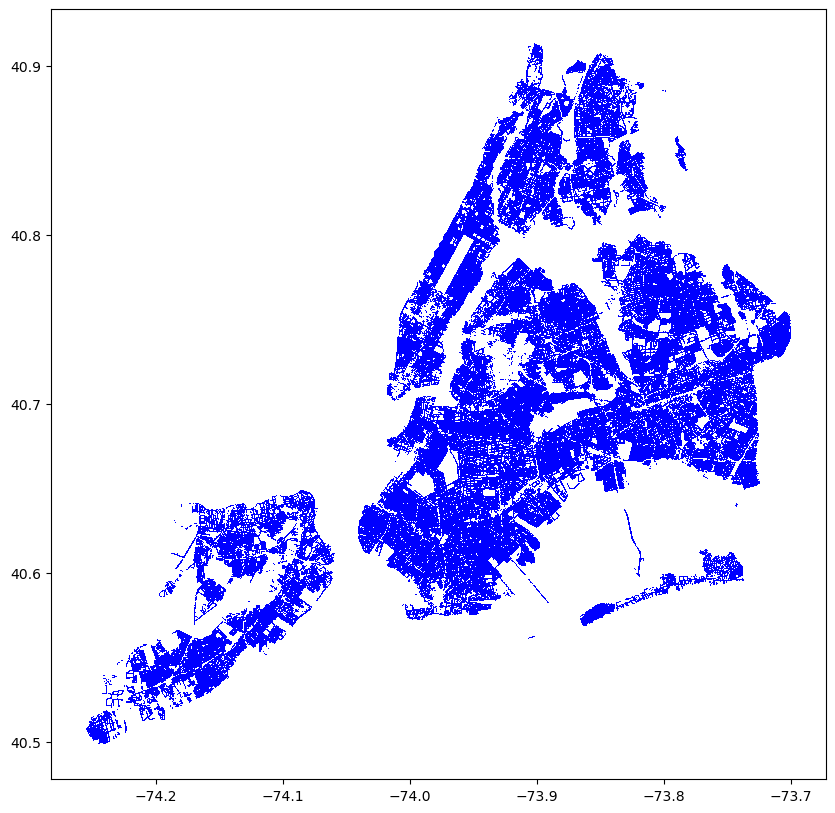

In [447]:
pyplot.plot(big_trees['longitude'],big_trees['Latitude'],marker=",",linestyle='none',color='blue',markersize=.05)
pyplot.rcParams["figure.figsize"] = 10,10

# Preregistration Statements: 
_Hypothesis 1:_ The number of public curbside trees per zip code increases with median household income, $\beta$(income)>0

_Hypothesis 2:_ The number of public curbside trees per zip code increases with percentage of white residents, $\beta$(white)>0

# Data Analysis:

## Overview / Purpose:

We begin by producing a scatter plot with Seaborn Regplot, which features a linear regression line by default. This gives us a preliminary idea of the relationship between Income and Trees per 100k Residents per Square Mile, although we haven't quantified it. You can see that there is clearly a positive relationship. In the next set of graphs, we break the same graph down by borough, showing roughly which boroughs have strong relationships between income and trees and which have significantly weaker ones. We then also show the same Regplot for white percentage vs. Income, which also exhibits a positive relationship, although a seemingly weaker one.

We then define train/test splits and run a linear regression with income as the input and trees per 100K capita per square mile as the output. A residuals plot reveals that our residuals exhibit heteroskedasticity. We then attempt to deal with this heteroskedasticity using a log transformation, a polynomical regression (quadratic), a multivariable linear, and multivariable quadratic -- using VIF scores to help us determine and reduce multi-collinearity.

Our results are as follows: \
**Summary of Accuracy Measures (Test RMSE, Test MAE):** \
Linear: 5686.2 and 4230.0 \
Multivariable Linear: 5716.7 and 4235.7 \
Quadratic: 5404.5 and 3961.3 \
Multivariable Quadratic: 5299.3 and 4163.5 \

All of the RMSE and MAE values are very close, so we perform hypothesis tests on them all. Additionally, there was no significant increase in error from train to test sets, meaning we are not concerned about overfitting at this point.

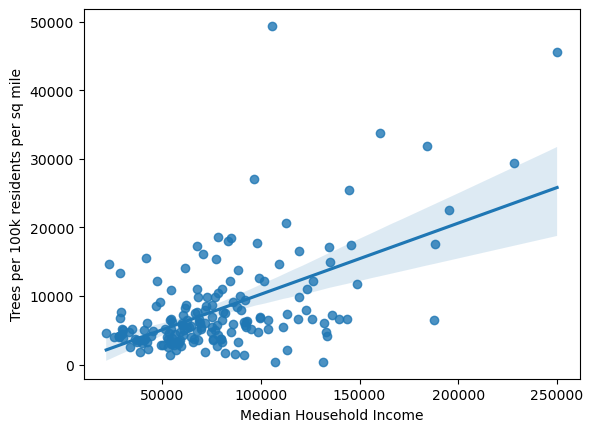

In [474]:
sns.regplot(x=trees_by_zip['household_income'],y=trees_by_zip['trees_per_capita_sq_mile'])
pyplot.xlabel('Median Household Income')
pyplot.ylabel('Trees per 100k residents per sq mile')
pyplot.rcParams["figure.figsize"] = 6.4,4.8

In this simple scatter plot, which exhibits Median Household Income on the X-axis against Trees per 100k residents per sq mile on the Y-axis, it is clear that there is a positive relationship between the two variables -- seemingly supporting our Hypothesis 1. However, at this point, it is still unclear whether household income is in fact the driving force behind this relationship, or is more of a byproduct or exhibition of another variable which has a stronger relationship with the tree count (such as racial make-up, for example).

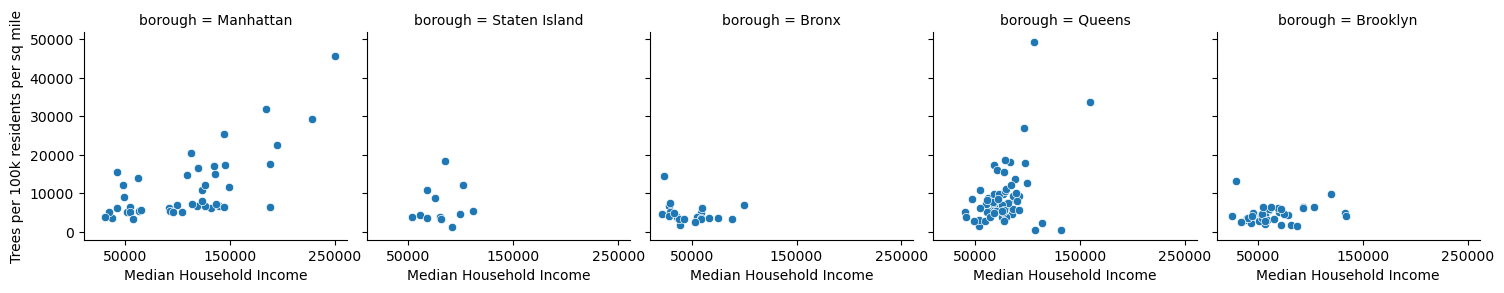

In [449]:
g = sns.FacetGrid(trees_by_zip, col="borough")
g.map(sns.scatterplot, "household_income","trees_per_capita_sq_mile")
g.set_axis_labels("Median Household Income", "Trees per 100k residents per sq mile")
g.set(xticks=[50000,150000,250000])

These scatterplots show the same variables as the one above it, but are broken down by borough. It's evident that boroughs such as Manhattan and Queens exhibit stronger positive relationships, while Staten Island, Brooklyn, and the Bronx don't seem to demonstrate much of a relationship at all. This is to be expected in part - the different relationship present in the different boroughs. For example, Manhattan, with its large number of sky-rises and high density of living, is quite different from Staten Island, which is, by comparison, quite sparsely populated.

Text(0, 0.5, 'Trees per 100k residents per sq mile')

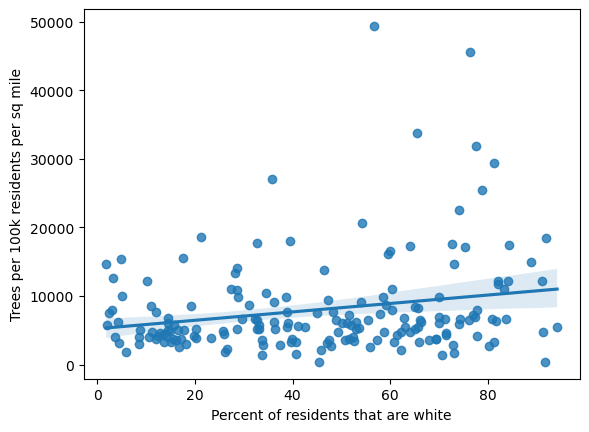

In [450]:
sns.regplot(x=trees_by_zip['white_pct'],y=trees_by_zip['trees_per_capita_sq_mile'])
pyplot.xlabel('Percent of residents that are white')
pyplot.ylabel('Trees per 100k residents per sq mile')

Here, it's evident that the portion of residents who are white has a less-strong relationship with the tree count than household income did. Yet, there still appears to be a slightly positive relationship which may support our Hypothesis 2.

In [451]:
# creating train/test splits for our independent and dependent variables
X1 = trees_by_zip[['household_income']]
y = trees_by_zip[['trees_per_capita_sq_mile']]
incomeTrain, incomeTest, treesTrain, treesTest = train_test_split(X1, y, test_size = 0.2, random_state=2950)

X2 = trees_by_zip[['white_pct']]
y = trees_by_zip[['trees_per_capita_sq_mile']]
whiteTrain, whiteTest, treesTrain, treesTest = train_test_split(X2, y, test_size = 0.2, random_state=2950)

In [452]:
def run_linear_regression(xTrain,xTest,yTrain,yTest):

    pq = LinearRegression().fit(xTrain, yTrain)
    train_predict = pq.predict(xTrain)
    test_predict = pq.predict(xTest)

    print("coefficients:  ")
    print(pq.coef_)
    print("intercept")
    print(pq.intercept_)
    
    #metrics:
    
    #RMSE
    test_mse = metrics.mean_squared_error(yTest, test_predict)
    test_rmse = np.sqrt(test_mse)
    train_mse = metrics.mean_squared_error(yTrain, train_predict)
    train_rmse = np.sqrt(train_mse)
    print('Train RMSE:',train_rmse)
    print('Test RMSE:',test_rmse)
    
    #MAE
    test_mae = metrics.mean_absolute_error(yTest, test_predict)
    train_mae = metrics.mean_absolute_error(yTrain, train_predict)
    print('Train MAE:',train_mae)
    print('Test MAE:',test_mae)
    
    #MAPE
    test_mape = np.mean(np.abs(yTest-test_predict)/yTest,axis=0).values[0]
    train_mape = np.mean(np.abs(yTrain-train_predict)/yTrain,axis=0).values[0]
    print('Train MAPE:',train_mape)
    print('Test MAPE:',test_mape)
    

In the cell above, we define a function that will use SKLearn to fit a Linear Regression.

In [453]:
run_linear_regression(incomeTrain, incomeTest, treesTrain, treesTest)

coefficients:  
[[0.10528894]]
intercept
[-259.1001892]
Train RMSE: 5934.334309057679
Test RMSE: 5686.238085686732
Train MAE: 3813.313812704273
Test MAE: 4230.046721688888
Train MAPE: 0.9931235839052506
Test MAPE: 0.7068135669052932


When we run a linear regression we find the following equation: $\hat{Y} = -0.10x + 478.13$ . This means that for every dollar increase in median houshold income in a zip code, the projected trees per 100k residents per square mile increases by 0.1. Our two measures of accuracy, RMSE and MAE, are 5,561.5 and 3,971.4 respectively. 

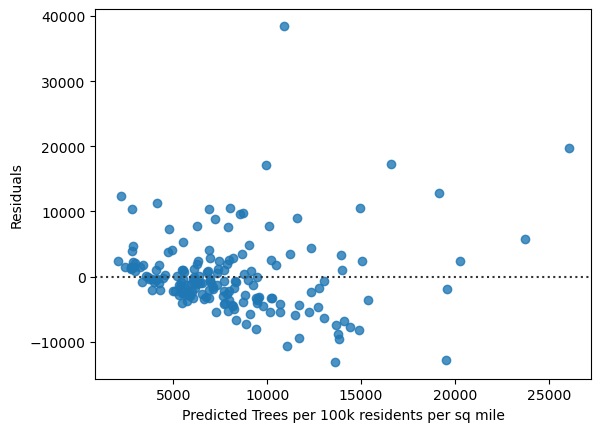

In [454]:
#residual plot here
pq = LinearRegression().fit(incomeTrain, treesTrain)
y_pred = pq.predict(trees_by_zip[['household_income']])
    
sns.residplot(data=trees_by_zip, x=y_pred, y=trees_by_zip['trees_per_capita_sq_mile'])
pyplot.xlabel('Predicted Trees per 100k residents per sq mile')
pyplot.ylabel('Residuals')
pyplot.show()

Here we graph a plot of the residuals for the single-variable regression of median household income and trees per 100k residents per sq mile. The residuals do not appear to be randomly dispersed, as there seems to be a slight downward slope and heteroskedasticity. It is clear that a single variable regression is not enough for our analysis.

In [455]:
trees_by_zip['log_trees']=np.log(trees_by_zip['trees_per_capita_sq_mile'])
X = trees_by_zip[['household_income']]
y_log = trees_by_zip[['log_trees']]
incomeTrain, incomeTest, log_treesTrain, log_treesTest = train_test_split(X, y_log, test_size = 0.2, random_state=2950)
run_linear_regression(incomeTrain, incomeTest, log_treesTrain, log_treesTest)

coefficients:  
[[8.01823618e-06]]
intercept
[8.09916517]
Train RMSE: 0.6643705602736351
Test RMSE: 0.5865386044725169
Train MAE: 0.46612931741382096
Test MAE: 0.4662947404497442
Train MAPE: 0.05533200553078207
Test MAPE: 0.05347625979555573


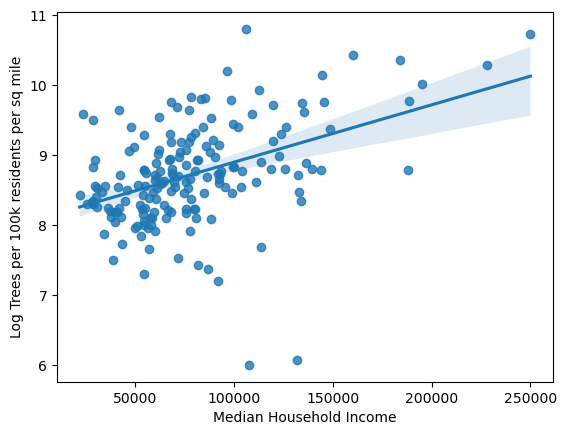

In [456]:
sns.regplot(x=trees_by_zip['household_income'],y=trees_by_zip['log_trees'])
pyplot.xlabel('Median Household Income')
pyplot.ylabel('Log Trees per 100k residents per sq mile')
pyplot.show()

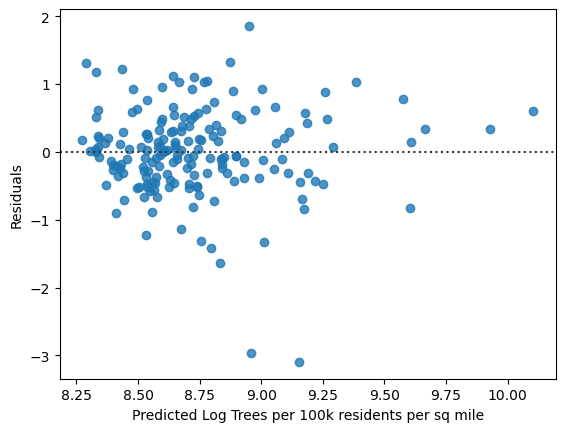

In [457]:
#residual plot here
pq = LinearRegression().fit(incomeTrain, log_treesTrain)
y_pred = pq.predict(trees_by_zip[['household_income']])
    
sns.residplot(data=trees_by_zip, x=y_pred, y=trees_by_zip['log_trees'])
pyplot.xlabel('Predicted Log Trees per 100k residents per sq mile')
pyplot.ylabel('Residuals')
pyplot.show()

In [458]:
def run_polynomial_regression(xTrain,xTest,yTrain, yTest,degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(xTrain)
    poly_reg_model = LinearRegression().fit(poly_features,yTrain)
    train_predict = poly_reg_model.predict(poly_features)
    test_predict = poly_reg_model.predict(poly.fit_transform(xTest))

    print("coefficients:  ")
    print(poly_reg_model.coef_)
    print("intercept")
    print(poly_reg_model.intercept_)
    
    #metrics:
    
     #RMSE
    test_mse = metrics.mean_squared_error(yTest, test_predict)
    test_rmse = np.sqrt(test_mse)
    train_mse = metrics.mean_squared_error(yTrain, train_predict)
    train_rmse = np.sqrt(train_mse)
    print('Train RMSE:',train_rmse)
    print('Test RMSE:',test_rmse)
    
    #MAE
    test_mae = metrics.mean_absolute_error(yTest, test_predict)
    train_mae = metrics.mean_absolute_error(yTrain, train_predict)
    print('Train MAE:',train_mae)
    print('Test MAE:',test_mae)

Another way to fit the data would be through polynomial regression. Here we define a function that takes inputs, outputs, and a degree number and fits a polynomial regression of the given degree. It also includes standard measures of accuracy RMSE and MAE.

In [459]:
run_polynomial_regression(incomeTrain, incomeTest, treesTrain, treesTest,2)

coefficients:  
[[-3.94729807e-02  6.50001656e-07]]
intercept
[6204.51768879]
Train RMSE: 5686.49611447636
Test RMSE: 5404.537545790551
Train MAE: 3601.9335197585547
Test MAE: 3961.333518379334


When we perform polynomial regression of degree 2 with median household income as the input and trees per 100k residents per square mile as the output, we receive the following equation: $\hat{Y} = 6799.56 -0.42x + 0.0000006x^2 $. Our measures of accuracy RMSE and MAE, are 5,172.99 and 3,832.23 respectively. These measures are less than those found with a single variable linear regression or multivariable linear regression, meaning the fit is slightly better.

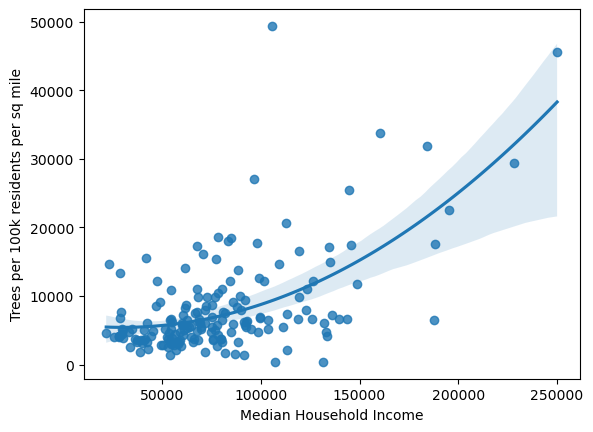

In [460]:
sns.regplot(x=trees_by_zip['household_income'],y=trees_by_zip['trees_per_capita_sq_mile'],order=2)
pyplot.xlabel('Median Household Income')
pyplot.ylabel('Trees per 100k residents per sq mile')
pyplot.show()

Here we plot this quadratic regression. The regression curve appears plausible, although a residual plot is needed to further anlayze fit.

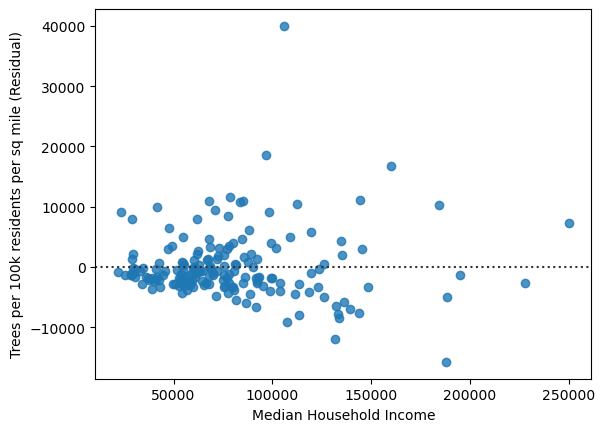

In [461]:
sns.residplot(data=trees_by_zip, x="household_income", y="trees_per_capita_sq_mile", order=2)
pyplot.xlabel('Median Household Income')
pyplot.ylabel('Trees per 100k residents per sq mile (Residual)')
pyplot.show()

The residuals plot for the quadratic regression appears slightly more randomly distributed and displays less heteroskedasticity than that of linear regression. There are still outliers, though, and heteroskedasticity is still present to an extent. 

In [462]:
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [vif(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores

vif_scores(trees_by_zip[['household_income', 'white_pct','black_pct', 'asian_pct', 'hispanic_pct', \
'population','SchoolTuitionAvg','walk_to_work_pct', 'male_pct', 'employment_pct', 'healthcare_avg',\
'Computers_per_house','land_area','Brooklyn', 'Manhattan', 'Queens','Staten Island']])

,Independent Features,VIF Scores
0,household_income,35.456246
1,white_pct,73.077705
2,black_pct,24.803123
3,asian_pct,16.468467
4,hispanic_pct,17.482226
5,population,10.026647
6,SchoolTuitionAvg,63.785152
7,walk_to_work_pct,6.936198
8,male_pct,244.727510
9,employment_pct,211.498508


We want to run a multivariable linear regression, but the first step is to eliminate independent variables from our Mutli-variable linear regression that have high levels of multi-collinearity with the other independent variables. Multi-collinearity is collinearity, but with all of the other variables in question. This function that we define above will return VIF scores for the variables in question (how well the variable is explained by other independent variables). As a reminder, our independent variables here are the different demographic and socio-economic descriptors of the zip-codes (like white %, median household income, and % that walk to work). We then run the function for all the independent variables and see that a few have very high scores.

In [463]:
vif_scores(trees_by_zip[['household_income', 'white_pct','black_pct', 'asian_pct', 'hispanic_pct', 'walk_to_work_pct', 'Brooklyn', 'Manhattan', 'Queens','Staten Island']])

,Independent Features,VIF Scores
0,household_income,13.405930
1,white_pct,15.369365
2,black_pct,3.786172
3,asian_pct,4.631841
4,hispanic_pct,2.429488
5,walk_to_work_pct,6.236029
6,Brooklyn,3.632788
7,Manhattan,4.823537
8,Queens,6.051427
9,Staten Island,2.245999


In [464]:
vif_scores(trees_by_zip[['household_income','black_pct', 'asian_pct', 'hispanic_pct', 'Brooklyn', 'Manhattan', 'Queens','Staten Island']])

,Independent Features,VIF Scores
0,household_income,5.864484
1,black_pct,2.094821
2,asian_pct,3.598459
3,hispanic_pct,1.897665
4,Brooklyn,2.319419
5,Manhattan,3.583733
6,Queens,4.519088
7,Staten Island,1.390734


Here, we now run that VIF function on the remaining independent variables. We now are left with VIF scores for our independent variables that are closer to 5 or 10, so we will use these in our multivariable regression.

In [465]:
X1 = trees_by_zip[['household_income','black_pct', 'asian_pct', 'hispanic_pct', 'Brooklyn', 'Manhattan', 'Queens','Staten Island']]
multiTrain, multiTest, treesTrain, treesTest = train_test_split(X1, y, test_size = 0.2, random_state = 2950)

In [466]:
run_linear_regression(multiTrain, multiTest, treesTrain, treesTest)

coefficients:  
[[ 1.14299578e-01  5.73094000e+01  1.03261178e+02  4.66128457e+01
  -3.37030005e+02  1.99190834e+03  1.44850723e+03 -4.36556737e+02]]
intercept
[-5917.89239043]
Train RMSE: 5694.9668674154345
Test RMSE: 5716.699514887942
Train MAE: 3621.8272007896817
Test MAE: 4235.746239248657
Train MAPE: 0.9468886611491166
Test MAPE: 0.6861018717321152


Now that we've dropped independent variables which featured high VIF scores, we run the Linear Regression again, this time with only our remaining independent variables as input. When we run this regression we find that trees per 100k residents per square mile increases with median household income as well as if the borough is Manhattan or Queens instead of the Bronx (our reference), while it decreases with all the other input variables.

In [467]:
run_polynomial_regression(multiTrain, multiTest, treesTrain, treesTest,2)

coefficients:  
[[ 1.72248639e-02  4.43839819e+02  9.24765640e+02  2.06308484e+02
   1.97615996e+03  6.41519279e+03  2.22450733e+03  1.15612445e+04
   9.57255793e-07 -1.61471306e-03 -2.62311438e-03 -1.20887408e-03
  -6.29530952e-02 -9.87807903e-02 -1.76999019e-02 -2.19643997e-01
  -2.50108356e+00 -9.81085107e+00 -3.48831349e+00 -1.17399878e+01
   2.35934957e+01  2.06044959e+01 -4.60050835e+02 -8.74595536e+00
  -7.82333351e+00 -1.20317563e+02 -1.42372821e+02  5.50074665e+01
  -6.68147079e+02 -1.20699079e-01  4.16320926e+01 -8.65896573e+01
  -5.56038510e+01  3.04786006e+02  1.97616010e+03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  6.41519292e+03  0.00000000e+00
   0.00000000e+00  2.22450725e+03  0.00000000e+00  1.15612453e+04]]
intercept
[-10109.20147507]
Train RMSE: 5024.7655345514495
Test RMSE: 5299.2940515186465
Train MAE: 3144.967119082456
Test MAE: 4163.465201003541


### Summary of Accuracy Measures (Test RMSE, Test MAE): 
Linear: 5686.2 and 4230.0 \
Multivariable Linear: 5716.7 and 4235.7 \
Quadratic: 5404.5 and 3961.3 \
Multivariable Quadratic: 5299.3 and 4163.5

All of the RMSE and MAE values are very close, so we perform hypothesis tests on them all. Additionally, there was no significant increase in error from train to test sets, meaning we are not concerned about overfitting at this point.

# Clustering:

### Overview/Purpose:
After building very quantitative models, we now turn to clustering to analyze more of the original data set of trees, specifically the tree species information. While linear regressions can show us the relationship between income and tree species in those zip codes, clustering enables us to break the zip codes into representative groups and see the more specific differences in tree species planted in those zip codes and neighborhoods.\
\
We start by normalizing the data and transforming the boroughs into discrete numbers. We also divide the racial percentages by 4 to adjust for the fact that racial composition would otherwise exhibit 4x the weight of the other features. We use KPrototypes clustering instead of Kmeans clustering (which we initially used) because the data is both categorical (the boroughs) and continuous (the income and racial percentages). We also use the elbow method to determine how many clusters to make (3) based on where the return in reduction in cost diminishes.\
\
From looking at the individual cluster data, the KPrototypes clustering broke the zip codes into 3 distinct groups. One is middle class, mostly in queens and Staten Island, and consists of fairly mixed racial make-ups. The second is lower class, almost entirely in the Bronx and Brooklyn, and predominatly black and hispanic. The third is distinctly upper class, almost entirely in Manhattan, and very white. This third cluster was significantly smaller in terms of the number of zip codes it included.\
\
Next, we show in a grouped bar chart how the 8 most common tree species compare across those three clusters, with certain tree species being much more commonly planted in rich neighborhoods and some much more common in poorer ones. We found the norway maple and honeylocust distributions to be especially stark and interesting: as you can see in the map, honey locusts are much more heavily planted in richer areas and norway maples are much more in poorer areas - with an extremely stark distinction.

In [468]:
cluster_df = trees_by_zip.drop(columns=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])
borough_map = {"Manhattan": 1, "Brooklyn": 2, "Bronx": 3, "Queens": 4, "Staten Island": 5}
update_borough = cluster_df['borough'].map(borough_map)
cluster_df['borough'] = update_borough

scaler = MinMaxScaler()

norm_trees = pd.DataFrame(scaler.fit_transform(cluster_df), columns=cluster_df.columns)
norm_trees['white_pct'] = norm_trees['white_pct'] / 4
norm_trees['black_pct'] = norm_trees['black_pct'] / 4
norm_trees['hispanic_pct'] = norm_trees['hispanic_pct'] / 4
norm_trees['asian_pct'] = norm_trees['asian_pct'] / 4
norm_inputs = norm_trees[['household_income', 'white_pct','black_pct', 'asian_pct', 'hispanic_pct', 'borough']]
norm_index = [5]

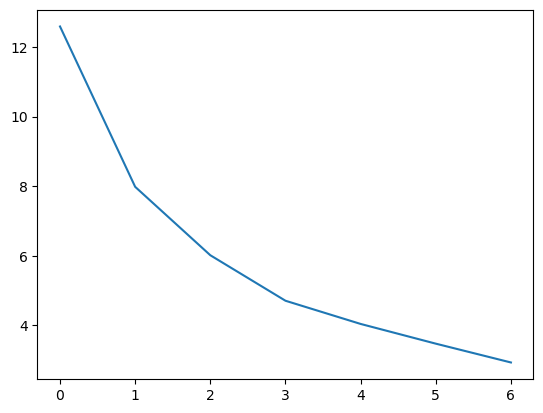

In [469]:
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters)
    kproto.fit_predict(norm_inputs, categorical=norm_index)
    cost.append(kproto.cost_)


pyplot.plot(cost)

In [470]:
kproto = KPrototypes(n_clusters=3, random_state = 2950)
clusters = kproto.fit_predict(norm_inputs, categorical=norm_index)

In [471]:
clustered_trees = pd.DataFrame(scaler.inverse_transform(norm_trees), columns=norm_trees.columns)

clustered_trees['cluster'] = list(clusters)

clustered_trees['white_pct'] = clustered_trees['white_pct'] * 4
clustered_trees['black_pct'] = clustered_trees['black_pct'] * 4
clustered_trees['hispanic_pct'] = clustered_trees['hispanic_pct'] * 4
clustered_trees['asian_pct'] = clustered_trees['asian_pct'] * 4
clustered_trees['zip']=clustered_trees['zip'].astype(int)

In [472]:
%sql cluster_summary_stats << SELECT cluster, mode(borough) AS 'Most Common Borough',\
                    avg(household_income) AS 'Mean Household Income',\
                    avg(white_pct) AS 'Average % White',\
                    avg(black_pct) AS 'Average % Black',\
                    avg(asian_pct) AS 'Average % Asian',\
                    avg(hispanic_pct) AS 'Average % Hispanic', \
                    FROM clustered_trees GROUP BY cluster ORDER BY cluster
cluster_summary_stats

Returning data to local variable cluster_summary_stats


,cluster,Most Common Borough,Mean Household Income,Average % White,Average % Black,Average % Asian,Average % Hispanic
0,0,4.0,76444.854444,50.632564,17.705931,21.463546,28.388876
1,1,2.0,49922.406273,37.798581,34.873363,8.517610,39.774896
2,2,1.0,137214.121432,77.906936,4.779983,16.906425,14.503842


Note that the racial percentages do not add up to 100% because of the way that the questions are asked on the census (Hispanic is asked separately from race).

<AxesSubplot:xlabel='household_income', ylabel='trees_per_capita_sq_mile'>

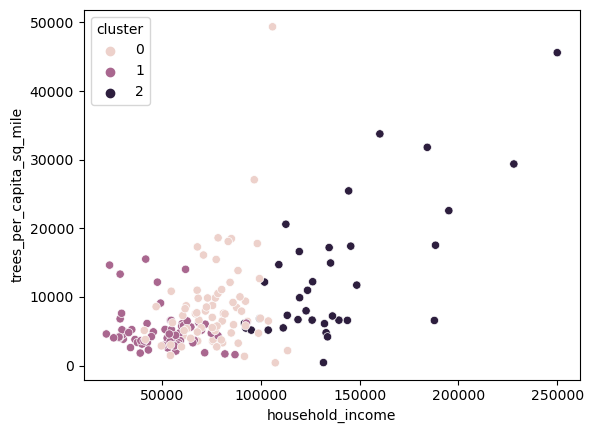

In [478]:
sns.scatterplot(data=clustered_trees, x="household_income", y="trees_per_capita_sq_mile", hue=clustered_trees['cluster'])

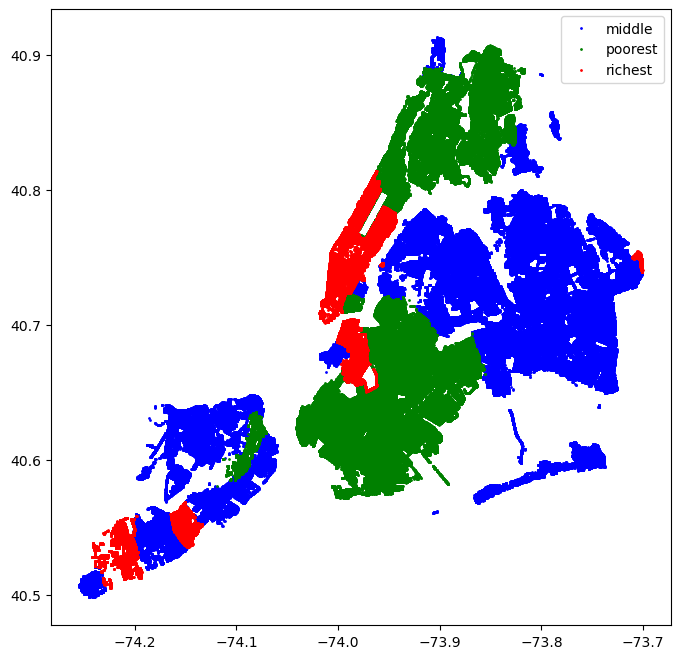

In [495]:
zero_zips=clustered_trees[clustered_trees['cluster']==0]['zip']
one_zips=clustered_trees[clustered_trees['cluster']==1]['zip']
two_zips=clustered_trees[clustered_trees['cluster']==2]['zip']

# print(len(zero_zips))
# print(len(one_zips))
# print(len(two_zips))

big_zero=big_trees[big_trees['zipcode'].isin(zero_zips)]
big_one=big_trees[big_trees['zipcode'].isin(one_zips)]
big_two=big_trees[big_trees['zipcode'].isin(two_zips)]

# print(len(big_zero))
# print(len(big_one))
# print(len(big_two))

pyplot.plot(big_zero['longitude'],big_zero['Latitude'],marker=".",linestyle='none',color='blue',markersize=2,label='middle')
pyplot.plot(big_one['longitude'],big_one['Latitude'],marker=".",linestyle='none',color='green',markersize=2,label='poorest')
pyplot.plot(big_two['longitude'],big_two['Latitude'],marker=".",linestyle='none',color='red',markersize=2,label='richest')
pyplot.rcParams["figure.figsize"] = 8,8
pyplot.legend()

In [480]:
%sql cluster_trees << SELECT cluster, \
                    avg(Pct_London_Planetree) AS 'Pct_London_Planetree',\
                    avg(Pct_Honeylocust)AS 'Pct_Honeylocust', \
                    avg(Pct_Callery_Pear)AS 'Pct_Callery_Pear', \
                    avg(Pct_Pin_Oak)AS 'Pct_Pin_Oak', \
                    avg(Pct_Norway_Maple)AS 'Pct_Norway_Maple', \
                    avg(Pct_Cherry)AS 'Pct_Cherry', \
                    avg(Pct_Japanese_Zelkova)AS 'Pct_Japanese_Zelkova', \
                    avg(Pct_Ginkgo)AS 'Pct_Ginkgo', \
                    FROM clustered_trees GROUP BY cluster ORDER BY cluster

Returning data to local variable cluster_trees


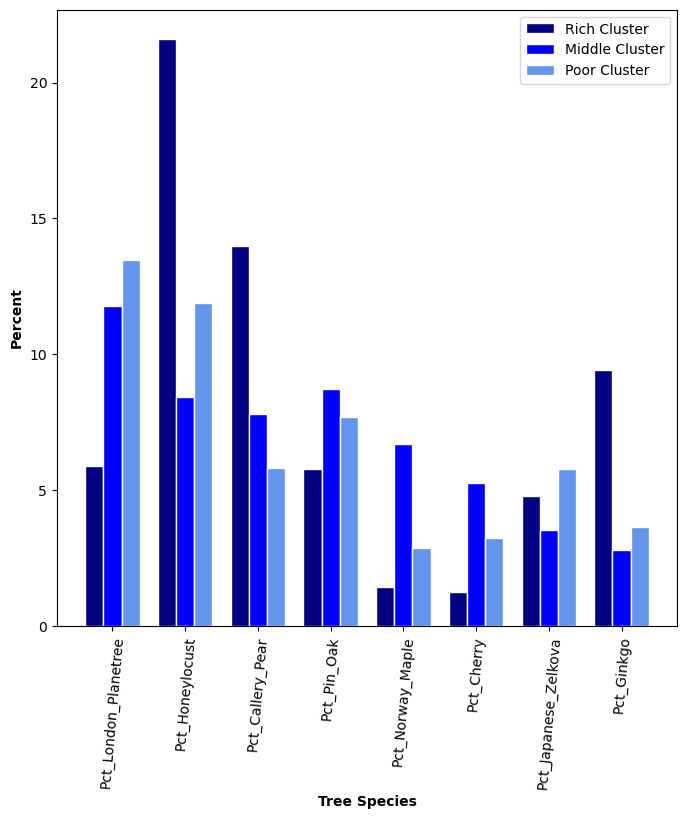

In [481]:
labels = ['Pct_London_Planetree','Pct_Honeylocust','Pct_Callery_Pear','Pct_Pin_Oak','Pct_Norway_Maple','Pct_Cherry','Pct_Japanese_Zelkova','Pct_Ginkgo']

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = cluster_trees.iloc[2,1:].to_numpy()
bars2 = cluster_trees.iloc[0,1:].to_numpy()
bars3 = cluster_trees.iloc[1,1:].to_numpy()

 
    
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
pyplot.bar(r1, bars1, color='navy', width=barWidth, edgecolor='white', label='Rich Cluster')
pyplot.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Middle Cluster')
pyplot.bar(r3, bars3, color='cornflowerblue', width=barWidth, edgecolor='white', label='Poor Cluster')
 
# Add xticks on the middle of the group bars
pyplot.xlabel('Tree Species', fontweight='bold')
pyplot.ylabel('Percent', fontweight='bold')

pyplot.xticks([r + barWidth for r in range(len(labels))], labels)
pyplot.xticks(rotation=85)
 
# Create legend & Show graphic
pyplot.legend()
pyplot.show()

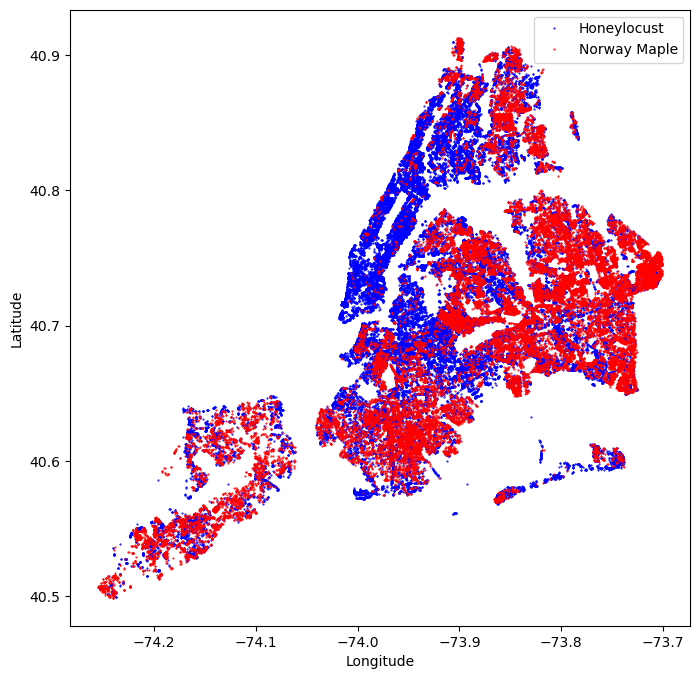

In [482]:
pyplot.xlabel('Longitude')
pyplot.ylabel('Latitude')
norway_maples=big_trees[big_trees['spc_common'] == 'Norway maple']
honeylocusts=big_trees[big_trees['spc_common'] == 'honeylocust']
pyplot.plot(honeylocusts['longitude'],honeylocusts['Latitude'],marker=".",linestyle='none',color='blue',markersize=1,label='Honeylocust')
pyplot.plot(norway_maples['longitude'],norway_maples['Latitude'],marker=".",linestyle='none',color='red',markersize=1,label='Norway Maple')
pyplot.rcParams["figure.figsize"] = 10,10
pyplot.legend()

# Evaluation of Significance:

# Bootstrapping:

### Overview/Purpose:
As a first method to test our hypothesis, we use a bootstrapped confidence interval. By bootstrapping, we are able resample the data many times in order to simulate a wide variety of samples. Each of these samples has a different regression slope, and we can plot all the resulting regression lines to see all the bootstrapped slopes. 

We then can plot all the slope coefficients in a histogram to see the distribution of betas. From there, a 95% confidence interval can be created. This interval contains all the slopes we'd expect to see with 95% certainty given this distribution. If our null hypothesis is nowhere in this range, then we can be 95% confident in rejecting it.

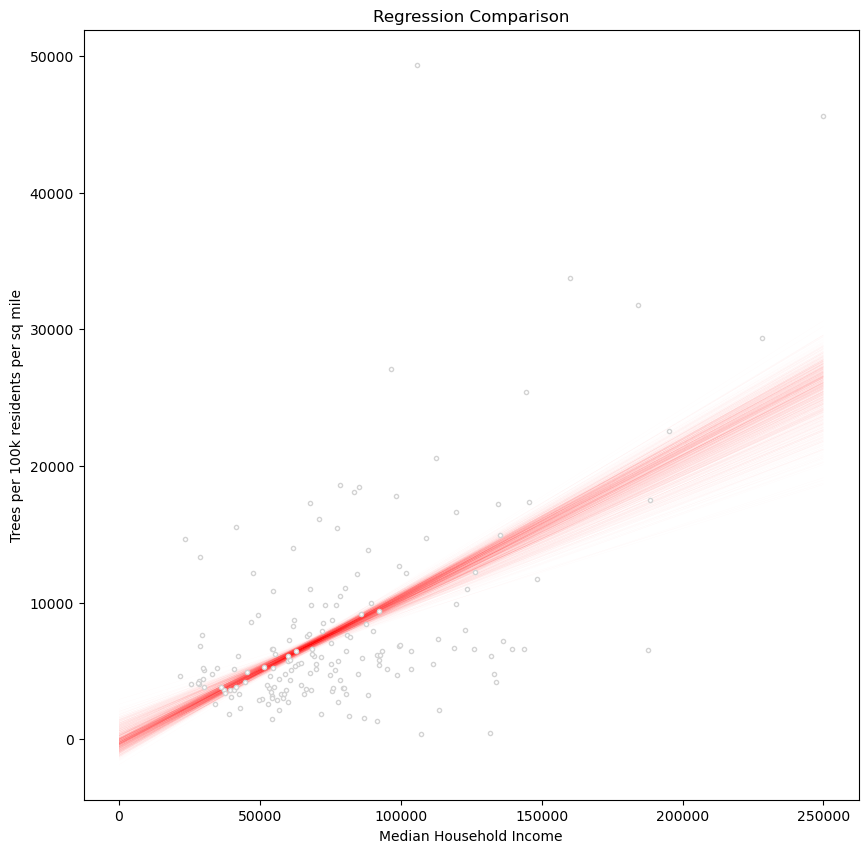

In [483]:
income_betas=np.zeros(1000)
for i in range(1000):
    np.random.seed(i) #to make results consistent each time we run it, still random
    bs_sample = trees_by_zip.sample(n=trees_by_zip.shape[0],replace=True)
    X_train, X_test, y_train, y_test = train_test_split(trees_by_zip[['household_income']], trees_by_zip[['trees_per_capita_sq_mile']], test_size = 0.2)
    model=LinearRegression().fit(X_train,y_train)
    x=np.linspace(0,250000)
    y=model.coef_[0]*x+model.intercept_
    pyplot.plot(x,y,linewidth=0.05, alpha=0.1, color='red')
    income_betas[i]=model.coef_[0]

pyplot.xlabel('Median Household Income')
pyplot.ylabel('Trees per 100k residents per sq mile')
pyplot.title("Regression Comparison")
pyplot.plot(trees_by_zip['household_income'], trees_by_zip['trees_per_capita_sq_mile'],marker='o', linestyle='none',markeredgecolor='lightgray',markerfacecolor='w',markersize=3)


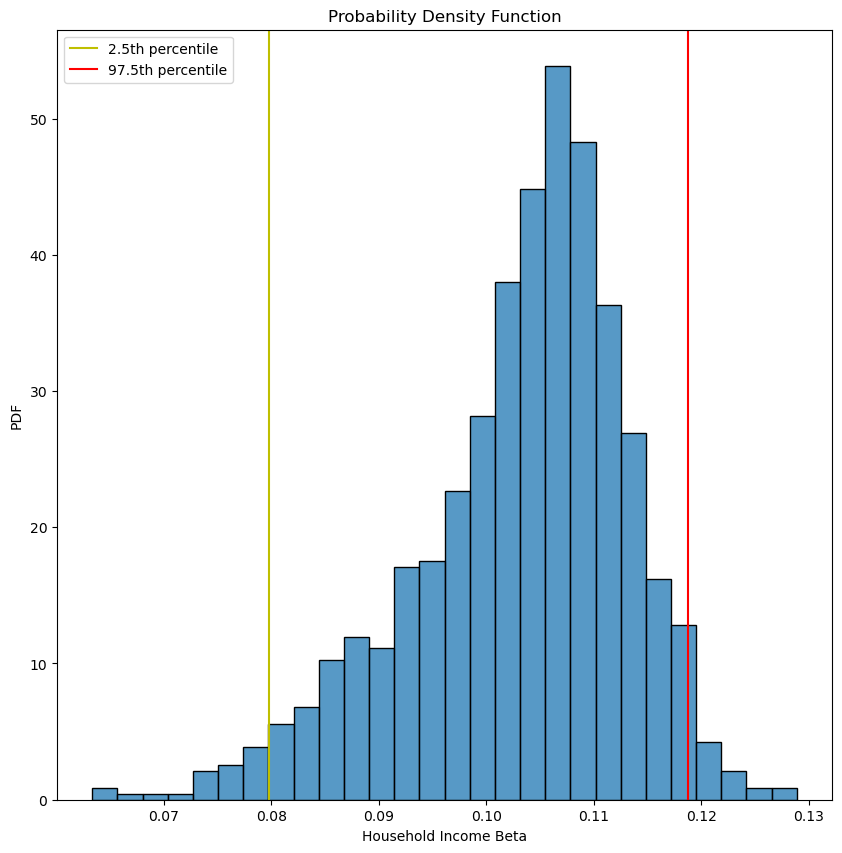

In [484]:
sns.histplot(income_betas,stat='density')
pyplot.axvline(x=np.percentile(income_betas,[2.5]), ymin=0, ymax=1,label='2.5th percentile',c='y')
pyplot.axvline(x=np.percentile(income_betas,[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='r')
pyplot.xlabel('Household Income Beta')
pyplot.ylabel("PDF")
pyplot.title("Probability Density Function")
pyplot.legend()
pyplot.show()

In [485]:
conf_interval = np.percentile(income_betas,[2.5,97.5])
print("The confidence interval is:",conf_interval)

The confidence interval is: [0.07978047 0.11875706]


After creating bootstrapped sample for the single variable regression with median houshold income and trees per capita per square mile, we see the confidence interval does not contain the value zero. This means that we are 95% confident that the $\beta$(household income)>0

# Hypothesis Tests:

### Overview/Purpose: 
Here, we conduct hypothesis tests on our different regressions. By doing so, we are able to distinguish which input variables have a statistically significant impact on our output. By looking at the P>|t| column, we see the probability that a coefficient of the magnitude found in our model could be produced in a random scenario. If the probability is less than 0.05, we are able to reject the notion that there is no significant impact (meaning that the impact is, in fact, significant). If the probability is greater than 0.05, we are unable to be sure that the result is significant. 

Additionally, we can look to the R-squared statistic as a measure of the percentage of the variation in the output variable that can be explained by its relationship to the input variable. This gives us a way to compare the various regressions and see which is the best fit for our model.

We begin with single variable linear models on household income and white percentage. These represent our two pre-registered analyses. In both tests, the coefficient of the input is statistically significant as the p-value is less than 0.05. This result holds as well when we run a hypothesis test on the log-transformed data for household income.

Next, we perform tests on our multivariable linear models for both non-transformed and log-transformed data. In the non-transformed data, we find that income and asian_pct are significant (with black_pct having a p-value of .051, making it very close). For the transformed data, income and the borough being Manhattan are the significant coefficients.

Lastly, we run a hypothesis test on the polynomial model and find that while the coefficient of the squared term is not significant, the coefficient of the linear term is.

We then create a table with the R-squared values for each model. We see that the polynomial, multivariable linear, and single variable linear on household income were the best fits. It's important to note, however, that the highest R-squared value was only 0.37. This means that none of the models were incredible fits for the data.

### Single Variable Linear (Household Income):

In [486]:
linear_model = sm.OLS(treesTrain, sm.add_constant(incomeTrain)).fit()
display(linear_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     trees_per_capita_sq_mile   R-squared:                       0.317
Model:                                  OLS   Adj. R-squared:                  0.312
Method:                       Least Squares   F-statistic:                     64.88
Date:                      Sat, 10 Dec 2022   Prob (F-statistic):           3.13e-13
Time:                              23:53:22   Log-Likelihood:                -1435.3
No. Observations:                       142   AIC:                             2875.
Df Residuals:                           140   BIC:                             2880.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -259.1002   1159.654     -0.223      0.824   -2551.798    2033.598
household_income     0.1053      0.013      8.055      0.000       0.079       0.131
==============================================================================
Omnibus:                       99.427   Durbin-Watson:                   2.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              988.698
Skew:                           2.326   Prob(JB):                    2.03e-215
Kurtosis:                      15.061   Cond. No.                     2.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Single Variable Linear (White Percentage):

In [487]:
linear_model_race = sm.OLS(treesTrain, sm.add_constant(whiteTrain)).fit()
display(linear_model_race.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     trees_per_capita_sq_mile   R-squared:                       0.038
Model:                                  OLS   Adj. R-squared:                  0.032
Method:                       Least Squares   F-statistic:                     5.587
Date:                      Sat, 10 Dec 2022   Prob (F-statistic):             0.0195
Time:                              23:53:22   Log-Likelihood:                -1459.5
No. Observations:                       142   AIC:                             2923.
Df Residuals:                           140   BIC:                             2929.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5521.0738   1266.240      4.360      0.000    3017.649    8024.499
white_pct     57.2289     24.212      2.364      0.019       9.361     105.097
==============================================================================
Omnibus:                      112.339   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              963.680
Skew:                           2.860   Prob(JB):                    5.49e-210
Kurtosis:                      14.409   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Log Transformation Linear (Household Income):


In [488]:
linear_log_model = sm.OLS(log_treesTrain, sm.add_constant(incomeTrain)).fit()
display(linear_log_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_trees   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     30.02
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           1.93e-07
Time:                        23:53:23   Log-Likelihood:                -143.42
No. Observations:                 142   AIC:                             290.8
Df Residuals:                     140   BIC:                             296.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.0992      0.130     62.384      0.000       7.842       8.356
household_income  8.018e-06   1.46e-06      5.479      0.000    5.13e-06    1.09e-05
==============================================================================
Omnibus:                       47.975   Durbin-Watson:                   2.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.954
Skew:                          -1.184   Prob(JB):                     5.08e-40
Kurtosis:                       7.998   Cond. No.                     2.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multivariable Linear:

In [489]:
multi_model = sm.OLS(treesTrain, sm.add_constant(multiTrain)).fit()
display(multi_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     trees_per_capita_sq_mile   R-squared:                       0.371
Model:                                  OLS   Adj. R-squared:                  0.333
Method:                       Least Squares   F-statistic:                     9.793
Date:                      Sat, 10 Dec 2022   Prob (F-statistic):           1.24e-10
Time:                              23:53:23   Log-Likelihood:                -1429.4
No. Observations:                       142   AIC:                             2877.
Df Residuals:                           133   BIC:                             2903.
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5917.8924   4093.339     -1.446      0.151    -1.4e+04    2178.574
household_income     0.1143      0.021      5.382      0.000       0.072       0.156
black_pct           57.3094     29.107      1.969      0.051      -0.263     114.882
asian_pct          103.2612     52.000      1.986      0.049       0.406     206.116
hispanic_pct        46.6128     43.622      1.069      0.287     -39.670     132.895
Brooklyn          -337.0300   2198.986     -0.153      0.878   -4686.539    4012.479
Manhattan         1991.9083   2136.798      0.932      0.353   -2234.595    6218.412
Queens            1448.5072   1976.780      0.733      0.465   -2461.486    5358.501
Staten Island     -436.5567   2831.800     -0.154      0.878   -6037.747    5164.634
==============================================================================
Omnibus:                       98.629   Durbin-Watson:                   2.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1087.897
Skew:                           2.250   Prob(JB):                    5.84e-237
Kurtosis:                      15.791   Cond. No.                     9.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multivariable Log:

In [490]:
multi_log_model = sm.OLS(log_treesTrain, sm.add_constant(multiTrain)).fit()
display(multi_log_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_trees   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     6.240
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           7.67e-07
Time:                        23:53:23   Log-Likelihood:                -134.59
No. Observations:                 142   AIC:                             287.2
Df Residuals:                     133   BIC:                             313.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.7872      0.449     17.354      0.000       6.900       8.675
household_income  5.819e-06   2.33e-06      2.500      0.014    1.21e-06    1.04e-05
black_pct            0.0051      0.003      1.612      0.109      -0.001       0.011
asian_pct            0.0086      0.006      1.505      0.135      -0.003       0.020
hispanic_pct         0.0009      0.005      0.193      0.847      -0.009       0.010
Brooklyn            -0.0272      0.241     -0.113      0.910      -0.504       0.450
Manhattan            0.5546      0.234      2.368      0.019       0.091       1.018
Queens               0.2576      0.217      1.189      0.237      -0.171       0.686
Staten Island        0.0043      0.310      0.014      0.989      -0.610       0.618
==============================================================================
Omnibus:                       53.305   Durbin-Watson:                   2.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.190
Skew:                          -1.297   Prob(JB):                     9.31e-49
Kurtosis:                       8.536   Cond. No.                     9.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Polynomial Single Variable (Household Income, second degree):

In [491]:
poly = PolynomialFeatures(degree=2, include_bias=False)
Xp = poly.fit_transform(incomeTrain)
poly_model = sm.OLS(treesTrain, sm.add_constant(Xp)).fit()
display(poly_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     trees_per_capita_sq_mile   R-squared:                       0.373
Model:                                  OLS   Adj. R-squared:                  0.364
Method:                       Least Squares   F-statistic:                     41.27
Date:                      Sat, 10 Dec 2022   Prob (F-statistic):           8.53e-15
Time:                              23:53:23   Log-Likelihood:                -1429.2
No. Observations:                       142   AIC:                             2864.
Df Residuals:                           139   BIC:                             2873.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6204.5177   2149.020      2.887      0.005    1955.523    1.05e+04
x1            -0.0395      0.043     -0.918      0.360      -0.125       0.046
x2            6.5e-07   1.85e-07      3.519      0.001    2.85e-07    1.02e-06
==============================================================================
Omnibus:                      118.647   Durbin-Watson:                   2.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1808.446
Skew:                           2.783   Prob(JB):                         0.00
Kurtosis:                      19.573   Cond. No.                     5.31e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [492]:
hypothesis_tests=pd.DataFrame()
hypothesis_tests['Method']=['Income Linear','White Linear','Log Income','Multivariable Linear','Multivariable Log','Polynomial Income']
hypothesis_tests['R-Squared']=[linear_model.rsquared,linear_model_race.rsquared,linear_log_model.rsquared,multi_model.rsquared,multi_log_model.rsquared,poly_model.rsquared]
hypothesis_tests.sort_values('R-Squared',ascending=False)

,Method,R-Squared
5,Polynomial Income,0.372565
3,Multivariable Linear,0.370694
0,Income Linear,0.316681
4,Multivariable Log,0.272903
2,Log Income,0.176578
1,White Linear,0.038375


# Interpretations and Conclusions:

With regard to our initial pre-registered hypotheses, the first null hypothesis was successfully rejected. The number of trees (per 100k people, per square mile) increased by **0.1** for every dollar increase in median household income. With a **t-value of 8.055**, we have a **confidence level of .999** that this result is statistically significant.

The second null hypothesis was also successfully rejected. The number of trees (per 100k people, per square mile) increased by **57.2289** for every percentage increase in white residents in a zip code. With a **t-value of 2.364**, we have a **confidence level of .95** that this result is statistically significant.

It is important to note that median household income and white percentage are correlated (as seen in our VIF table). While the coefficients for both were statistically significant, it is likely that household income is a better predictor of street trees than white percentage as exemplified by the R-squared values of each model (0.32 for income, 0.04 for white percent). Additionally, statistical significance is not immune from error. It is possible that there are even more confounding variables that were not considered in this analysis. Furthermore, there is the possibility of a type I error in which we reject the null hypothesis despite it being true.

In additiona to our pre-registered hypotheses, we also found that when we add aditional demographic variables into our model, the model's fit improves. We still find that median household income is significant, but racial makeup and borough also play an important role. For example, in the multivariable model, we expect a decrease of 337.0 street trees if a zip code is in Brooklyn compared to the Bronx, but an increase of 1991.9 trees if it's in Manhattan. 

Having more public curbside trees in a neighborhood is associated with a wide variety of benefits. Trees can help to improve air quality by removing pollutants from the air through a process called "biological filtration."
Trees can increase property values by making the area more attractive and desirable to potential buyers or renters. They can provide shade and can help to cool the air around them, which can reduce the urban heat island effect and make the area more comfortable for people. Stormwater management is improved as trees can help to reduce stormwater runoff by intercepting rainfall and allowing it to slowly infiltrate into the ground. Trees can also provide shade and block wind, which can reduce the amount of energy needed to heat and cool buildings. Additionally trees can provide habitat and food for a variety of wildlife species, including birds, mammals, and insects.

We find in our model that certain demographic characteristics are important predictors of the number of these street trees found in a given neighborhood. The most statistically significant one is median household income. An increase of $10,000 in the median income of a zip code is associated with 1053 increase in street trees per 100k residents per square mile. This means wealthier neighborhoods are reaping more of the benefits of publicly planted trees in New York City. 

By clustering the zip codes into three categories (loosely by socioeconomic status), we also find interesting differences in the prevalence of certain tree species. For example, Honeylocusts are much more common in wealthier white neighborhoods while Norway Maples are common in middle-class residential neighborhoods. Our analysis illuminates the differences in species breakdown in each cluster, but additional domain knowledge is required to determine the different benefits that each species of trees provides and thus the implications of this breakdown.


# Limitations:
The first limitation present stems from the source of the data. While the New York City street tree census is comprehensive and extensive, it does rely on volunteer data and is thus likely to have some margin of error. Additionally, the census covers only trees on public curbsides, not in parks or private property. While curbside trees are most controllable by public authorities and thus the most likely to be influenced by political factors, they are not the only source of the benefit of trees in the city. The assumption that curbside trees have an effect on quality of life for nearby residents is likely correct, but not the entire story. 

Ideally, it would have probably been superior to also include park trees in some manner. This would account for local parks, which can have an enormous impact on the presence of nearby trees in a neighborhood, but was not accounted for in our data set, which only included street trees. For example, the famous Central Park has more than 18,000 trees and borders many expensive zip-codes, but was not accounted for in our data or our analyses.

In terms of the demographic data derived from zip codes, one limitation is that the Census does not receive equal response rates from all neighborhoods and that may affect the margins of error in the data. Additionally, we needed to choose which socioeconomic variables to include and which to exclude when downloading the data, as it would be impossible to include every variable. In doing so, there is the possibility that a certain significant variable was left out of the analysis. In addition, some variables are estimates while others are reported/asked on the census. Median Household Income is a lot more reputable and accurate than something like number of computers per household or percentage of residents who walk to work.

# Source Code:
Included in data cleaning file below

# Acknowledgements:
We'd like to thank Professor Mimno for help in many office hours, Kefan Lu (TA).

# Appendix:

Updated Data Cleaning File: 
https://github.coecis.cornell.edu/atm76/2950Project (must be logged into Cornell enterprise Github)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e3ee9b91-b09e-4801-8df4-d8122343103e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>